In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Charger les fichiers CSV
data_concatene = pd.read_csv('Resume_Clean/Concate_Resume.csv') 

In [3]:
# Charger les données (assurez-vous que 'data_concatene' est déjà chargé)
data_concatene = pd.read_csv('Resume_Clean/Concate_Resume.csv')

# Initialiser le LabelEncoder
encoder = LabelEncoder()

# Appliquer l'encodage sur la colonne 'Category'
data_concatene['Category'] = encoder.fit_transform(data_concatene['Category'])


# Afficher le mapping des labels (numéros) aux catégories
category_mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

# Afficher le mapping
print("\nMapping des labels aux catégories :")
for label, category in category_mapping.items():
    print(f"{label}: {category}")



Mapping des labels aux catégories :
0: Accountant
1: Advocate
2: Agricultural
3: Apparel
4: Automobile
5: Aviation
6: BPO
7: Banking
8: Blockchain
9: Building & Construction
10: Business Analyst
11: Business Development
12: Consultant
13: Data Science
14: Database
15: Designer
16: Developer
17: Digital Media
18: Education
19: Engineering
20: Finance
21: HR
22: Health & Fitness
23: Information Technology
24: Management
25: Public Relations
26: SAP Developer
27: Sales
28: Security
29: Testing
30: business-development
31: chef
32: database
33: digital-media
34: food & beverages
35: health & fitness
36: managment
37: public-relations


## Modeles

In [4]:
# Initialisation des DataFrames pour train et test
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Récupérer les catégories uniques dans le jeu de données
unique_categories = data_concatene['Category'].unique()

# Boucle sur chaque catégorie pour diviser les données proportionnellement
for category in unique_categories:
    # Filtrer les données pour la catégorie actuelle
    temp_df = data_concatene[data_concatene['Category'] == category]
    
    # Division en test (10%) et entraînement (90%)
    temp_train_df, temp_test_df = train_test_split(temp_df, test_size=0.2, random_state=42)
    
    # Concaténation des données de cette catégorie avec les ensembles globaux
    train_df = pd.concat([train_df, temp_train_df])
    test_df = pd.concat([test_df, temp_test_df])

# Sélectionner les colonnes nécessaires après concaténation
train_df = train_df[['Resume', 'Category']]
test_df = test_df[['Resume', 'Category']]

# Afficher les formes des différents ensembles
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')


Train shape: (3705, 2)
Test shape: (946, 2)


In [5]:
# Convertir les textes des CVs en vecteurs TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['Resume'])
X_test = vectorizer.transform(test_df['Resume'])

# Cibles (les catégories)
y_train = train_df['Category']
y_test = test_df['Category']

## SVM

In [6]:
# Paramètres SVC adaptés
svc_model = SVC(
    kernel='linear',          
    C=1,                 
    class_weight='balanced',  
    probability=True          
)

svc_model.fit(X_train, y_train)


y_pred_SVC = svc_model.predict(X_test)


print("Rapport de classification :")
print(classification_report(y_test, y_pred_SVC))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.81      0.72      0.76        40
           2       0.88      0.78      0.82        18
           3       0.46      0.52      0.49        23
           4       0.71      0.38      0.50        13
           5       0.81      0.65      0.72        26
           6       0.86      0.60      0.71        10
           7       0.96      0.76      0.85        33
           8       1.00      1.00      1.00         8
           9       0.76      0.84      0.80        31
          10       1.00      1.00      1.00         6
          11       0.29      0.22      0.25         9
          12       0.53      0.34      0.42        29
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        17
          15       0.87      0.61      0.72        77
          16       1.00      0.98      0.99        43

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [7]:
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy du modèle : {accuracy * 100:.2f}%')

Accuracy du modèle : 75.26%


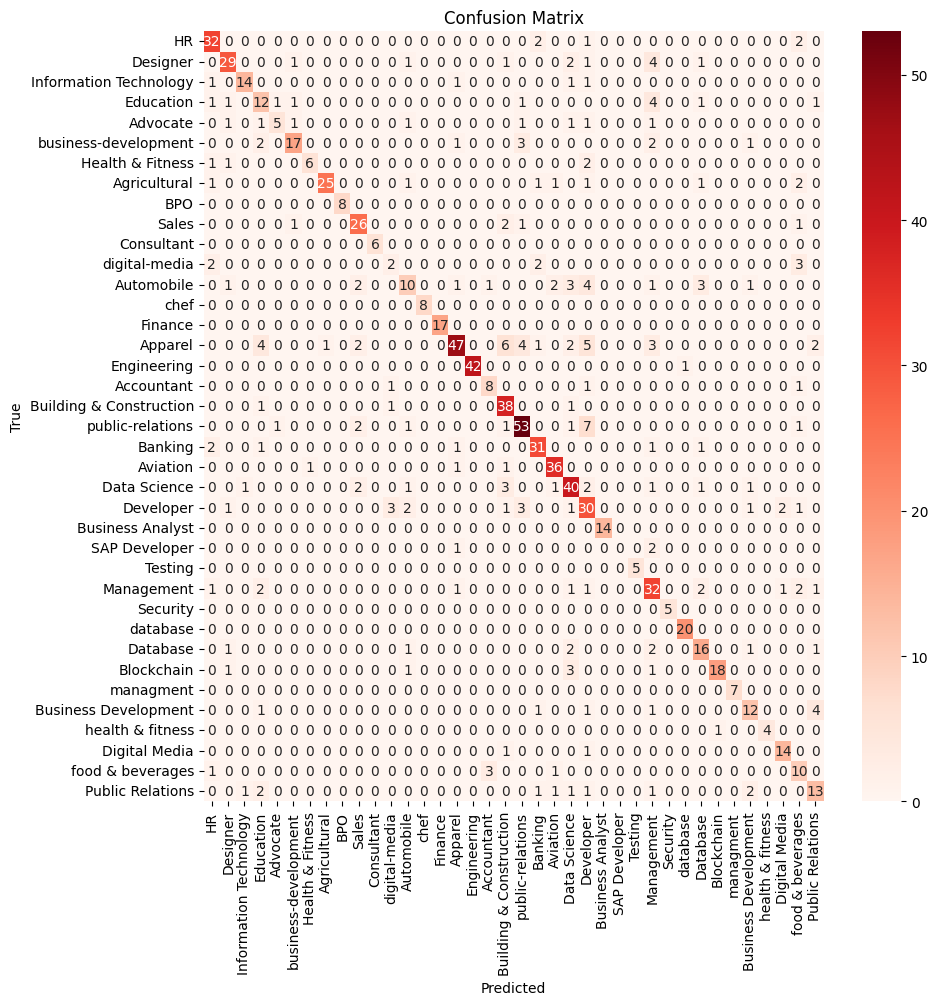

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
class_names =['HR', 'Designer', 'Information Technology', 'Education',
       'Advocate', 'business-development', 'Health & Fitness',
       'Agricultural', 'BPO', 'Sales', 'Consultant', 'digital-media',
       'Automobile', 'chef', 'Finance', 'Apparel', 'Engineering',
       'Accountant', 'Building & Construction', 'public-relations',
       'Banking', 'Aviation', 'Data Science', 'Developer',
       'Business Analyst', 'SAP Developer', 'Testing', 'Management',
       'Security', 'database', 'Database', 'Blockchain', 'managment',
       'Business Development', 'health & fitness', 'Digital Media',
       'food & beverages', 'Public Relations']
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## KNN

In [23]:
knn_model = KNeighborsClassifier(
    n_neighbors=50,         
    weights='distance',    
    metric='cosine',        
    algorithm='auto'      
)

# Entraîner le modèle avec les données d'entraînement
knn_model.fit(X_train, y_train)
# Faire des prédictions sur le jeu de test
y_pred_knn = knn_model.predict(X_test)
# Étape 4 : Évaluer les performances
print("Rapport de classification :")
print(classification_report(y_test, y_pred_knn))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.57      0.73      0.64        37
           1       0.75      0.75      0.75        40
           2       0.89      0.47      0.62        17
           3       0.40      0.09      0.15        22
           4       1.00      0.08      0.15        12
           5       0.81      0.85      0.83        26
           6       1.00      0.22      0.36         9
           7       0.77      0.52      0.62        33
           8       1.00      1.00      1.00         8
           9       0.69      0.81      0.75        31
          10       1.00      1.00      1.00         6
          11       0.50      0.11      0.18         9
          12       0.27      0.11      0.15        28
          13       0.89      1.00      0.94         8
          14       1.00      1.00      1.00        16
          15       0.91      0.66      0.77        77
          16       0.93      1.00      0.97        43

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [26]:
# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy du modèle KNN : {accuracy * 100:.2f}%')


Accuracy du modèle KNN : 69.92%


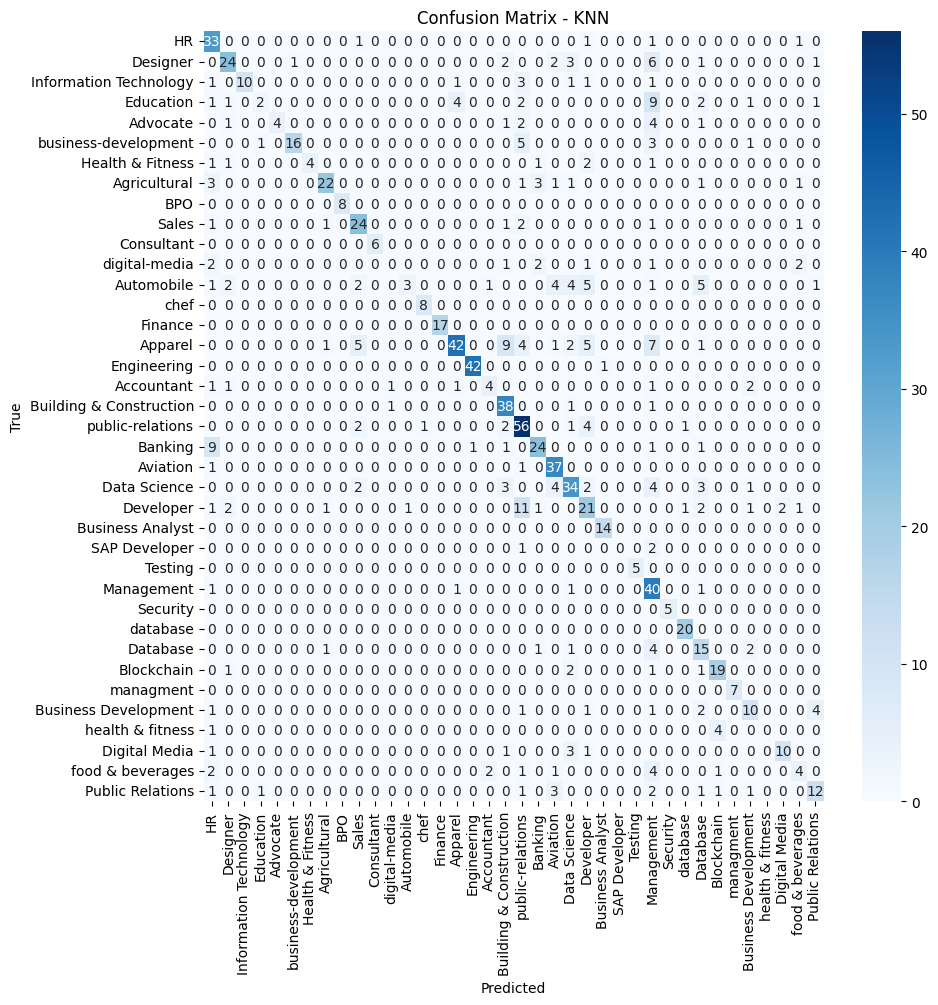

In [11]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Visualisation
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()


## Random Forest classifier

In [27]:

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Entraîner le modèle sur le jeu d'entraînement
rf_model.fit(X_train, y_train)
# Faire des prédictions sur le jeu de test
y_pred_rf = rf_model.predict(X_test)

print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        37
           1       0.84      0.78      0.81        40
           2       1.00      0.47      0.64        17
           3       0.71      0.23      0.34        22
           4       1.00      0.17      0.29        12
           5       0.77      0.88      0.82        26
           6       1.00      0.11      0.20         9
           7       0.61      0.61      0.61        33
           8       1.00      1.00      1.00         8
           9       0.79      0.71      0.75        31
          10       1.00      1.00      1.00         6
          11       0.00      0.00      0.00         9
          12       0.60      0.11      0.18        28
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        16
          15       0.77      0.69      0.73        77
          16       1.00      1.00      1.00        43

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [ ]:


# Calculer l'accuracy
accuracy = accuracy_score(y_test,y_pred_rf)
print(f'Accuracy du modèle Random Forest : {accuracy * 100:.2f}%')


Accuracy du modèle Random Forest : 71.04%


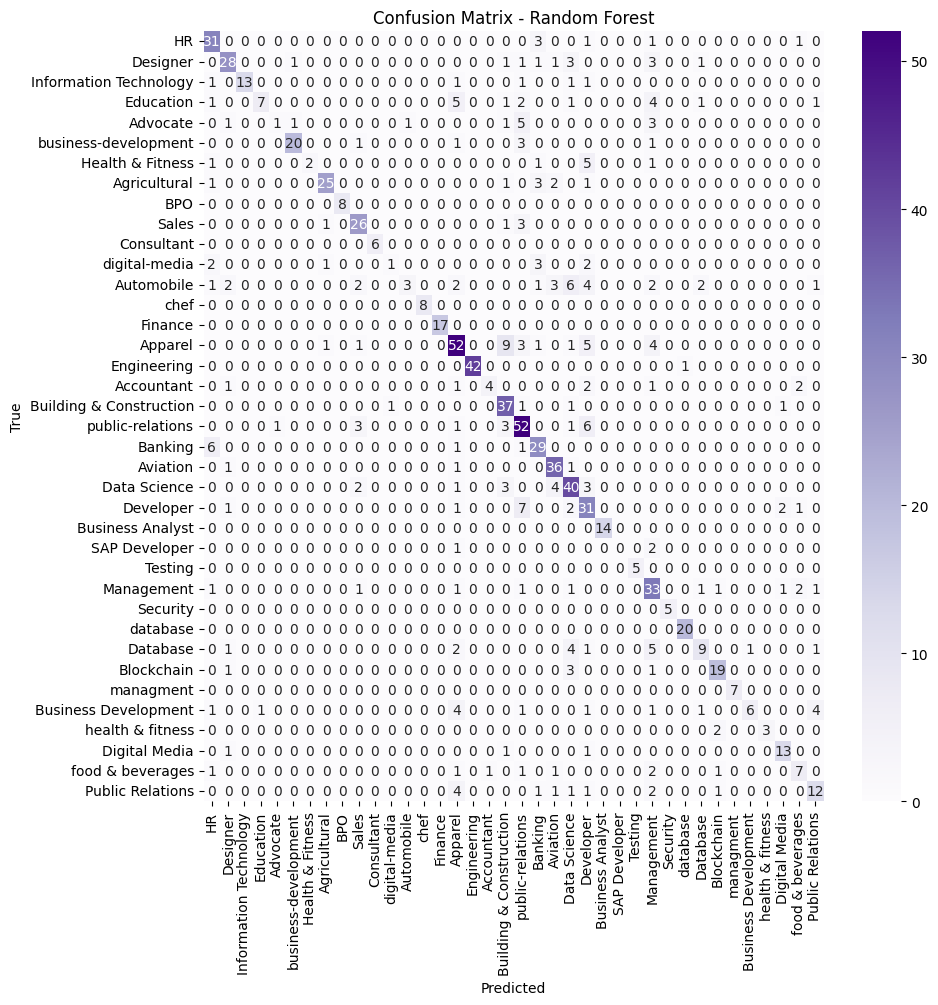

In [14]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Decision Tree

In [28]:
# Initialisation du modèle Arbre de Décision
tree_model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur le jeu d'entraînement
tree_model.fit(X_train, y_train)
# Faire des prédictions sur le jeu de test
y_pred_tree = tree_model.predict(X_test)

print("Rapport de classification :")
print(classification_report(y_test, y_pred_tree))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        37
           1       0.71      0.68      0.69        40
           2       0.44      0.41      0.42        17
           3       0.41      0.32      0.36        22
           4       0.14      0.08      0.11        12
           5       0.74      0.77      0.75        26
           6       0.12      0.11      0.12         9
           7       0.62      0.61      0.62        33
           8       1.00      1.00      1.00         8
           9       0.80      0.65      0.71        31
          10       1.00      1.00      1.00         6
          11       0.20      0.22      0.21         9
          12       0.28      0.29      0.28        28
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        16
          15       0.63      0.64      0.63        77
          16       0.98      1.00      0.99        43

In [16]:


# Calculer l'accuracy
accuracy = accuracy_score(y_test,y_pred_tree )
print(f'Accuracy du modèle Arbre de Décision : {accuracy * 100:.2f}%')


Accuracy du modèle Arbre de Décision : 63.74%


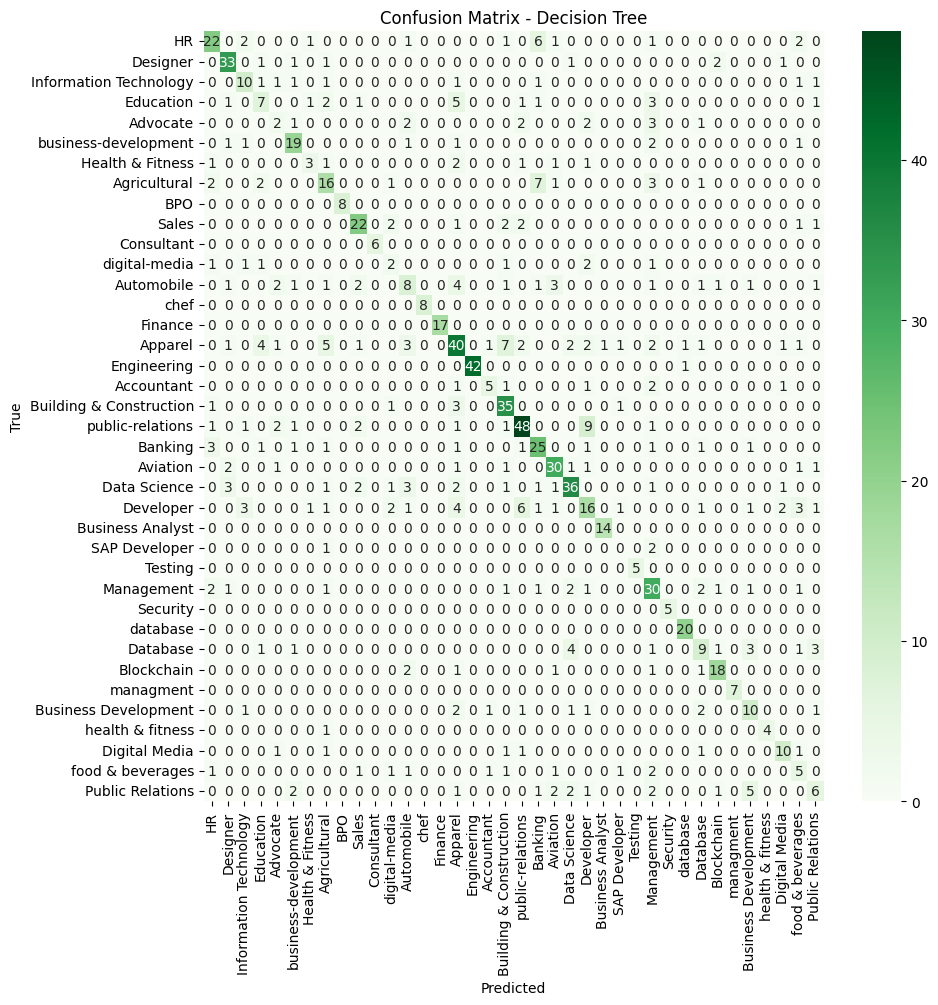

In [17]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test,y_pred_tree )

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
